 # Project 7: Explanatory Data Analysis & Advanced Visualization (Baby Names Dataset)

## First Inspection: The most popular Names in 2018 

In [1]:
# Import Libraries 
# matplot for graphs 
# set display format 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

In [23]:
#read in data for inspection 
df = pd.read_csv("us_baby_names.csv")

In [24]:
#Inspect data
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [25]:
#Check summary info and data types are correct 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Name    object
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


 - Gender column could be converted to category / helps with memory usage as well

In [26]:
#check number of unique values 
df.nunique()

Year        139
Name      98400
Gender        2
Count     13720
dtype: int64

In [27]:
#assign gender to category 
df.Gender = df.Gender.astype("category")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype   
---  ------  -----   
 0   Year    int64   
 1   Name    object  
 2   Gender  category
 3   Count   int64   
dtypes: category(1), int64(2), object(1)
memory usage: 46.7+ MB


 - Memory data down to 46.7 MB from 59 MB after categorizing gender data type 

In [29]:
#Work with new copy of dataset for year 2018  
names_2018 = df[df.Year == 2018].copy()
names_2018

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [30]:
# Top 10 names with the highest count for female names 
names_2018[names_2018.Gender == "F"].nlargest(10, "Count")

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [31]:
#Create function for year, gender and most popular names 
def most_pop(year, gender, n):
    return df[(df.Year == year) & (df.Gender == gender)].nlargest(n, "Count")

In [32]:
# Find most popular female 
most_pop(2018, "F", 10)

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [33]:
#Male most popular names 
most_pop(2018, "M", 10)

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389
1943047,2018,Benjamin,M,13381
1943048,2018,Elijah,M,12886
1943049,2018,Lucas,M,12585
1943050,2018,Mason,M,12435
1943051,2018,Logan,M,12352


## Evergreen Names (1880 - 2018)

- Where there any names that were still popular 180 years ago used today? 

In [34]:
# Find most poopular names in 2018 Female
f_2018 = most_pop(2018, "F", 20)
f_2018

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [35]:
#Filter most popular names F 1880
f_1880 = most_pop(1880, "F", 20)
f_1880

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
5,1880,Margaret,F,1578
6,1880,Ida,F,1472
7,1880,Alice,F,1414
8,1880,Bertha,F,1320
9,1880,Sarah,F,1288


In [47]:
#Merge the two years together 1880 and 2018 and count values / changes suffixes 

f_2018[["Name", "Count"]].merge(f_1880[["Name", "Count"]], how = "inner", on = "Name", 
                                suffixes= ("_2018", "1880"))
f_evergreen

NameError: name 'f_2018' is not defined

In [18]:
#Find the males mot popular names for 2018 
m_2018 = most_pop(2018, "M", 20)
m_2018

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389
1943047,2018,Benjamin,M,13381
1943048,2018,Elijah,M,12886
1943049,2018,Lucas,M,12585
1943050,2018,Mason,M,12435
1943051,2018,Logan,M,12352


In [38]:
#Find male smost popular names for 1880
m_1880 = most_pop(1880, "M", 20)
m_1880

,Year,Name,Gender,Count
942,1880,John,M,9655
943,1880,William,M,9532
944,1880,James,M,5927
945,1880,Charles,M,5348
946,1880,George,M,5126
947,1880,Frank,M,3242
948,1880,Joseph,M,2632
949,1880,Thomas,M,2534
950,1880,Henry,M,2444
951,1880,Robert,M,2415


In [37]:
#Merge data together and show count value and suffixes 
m_evergreen = m_2018[["Name", "Count"]].merge(m_1880[["Name", "Count"]], how = "inner", on = "Name", 
                                              suffixes=("_2018", "_1880"))
m_evergreen

NameError: name 'm_2018' is not defined

## Advanced Data Aggregation

- Aggregate all baby names 

- Consider all combinations for names and gender 

- total count since 1880 

In [4]:
#read in data 
df = pd.read_csv("us_baby_names.csv")

In [5]:
#Explore data
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Name    object
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


In [7]:
#Filter count for name and gender
df.groupby(["Name", "Gender"]).Count.sum().reset_index(level = -1)

,Gender,Count
Name,,
Aaban,M,114
Aabha,F,35
Aabid,M,16
Aabidah,F,5
Aabir,M,10
...,...,...
Zyvion,M,5
Zyvon,M,7
Zyyanna,F,6


In [8]:
#Use groupby function / agg function / total count from fist use to last used name 
agg = df.groupby(["Name", "Gender"]).agg(Total = ("Count", "sum"), No_Year = ("Count", "count"), 
                                         First_Year = ("Year", "min"), Last_Year = ("Year", "max"),
                                         Max_Count = ("Count", "max"))

In [9]:
agg

,,Total,No_Year,First_Year,Last_Year,Max_Count
Name,Gender,,,,,
Aaban,M,114,11,2007,2018,16
Aabha,F,35,5,2011,2016,9
Aabid,M,16,3,2003,2018,6
Aabidah,F,5,1,2018,2018,5
Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5
Zyvon,M,7,1,2015,2015,7
Zyyanna,F,6,1,2010,2010,6


In [10]:
#Sort by highest to lowest count by function / return the largest nuber in count column 
def best_year(group):
    return group.nlargest(1, "Count").Year

In [11]:
best_y = df.groupby(["Name", "Gender"]).apply(best_year)

In [12]:
#Explore best years for names 
best_y

Name     Gender         
Aaban    M       1817711    2014
Aabha    F       1803981    2014
Aabid    M       1953741    2018
Aabidah  F       1940601    2018
Aabir    M       1890403    2016
                            ... 
Zyvion   M       1658038    2009
Zyvon    M       1856007    2015
Zyyanna  F       1675008    2010
Zyyon    M       1824324    2014
Zzyzx    M       1692111    2010
Name: Year, Length: 109173, dtype: int64

In [13]:
# drop one index level / name and gender only 
best_y.droplevel(-1)

Name     Gender
Aaban    M         2014
Aabha    F         2014
Aabid    M         2018
Aabidah  F         2018
Aabir    M         2016
                   ... 
Zyvion   M         2009
Zyvon    M         2015
Zyyanna  F         2010
Zyyon    M         2014
Zzyzx    M         2010
Name: Year, Length: 109173, dtype: int64

In [14]:
agg["Best_Year"] = best_y.droplevel(-1)

In [15]:
agg

,,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
Name,Gender,,,,,,
Aaban,M,114,11,2007,2018,16,2014
Aabha,F,35,5,2011,2016,9,2014
Aabid,M,16,3,2003,2018,6,2018
Aabidah,F,5,1,2018,2018,5,2018
Aabir,M,10,2,2016,2018,5,2016
...,...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5,2009
Zyvon,M,7,1,2015,2015,7,2015
Zyyanna,F,6,1,2010,2010,6,2010


In [16]:
agg.reset_index(inplace = True)

In [17]:
agg

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
0,Aaban,M,114,11,2007,2018,16,2014
1,Aabha,F,35,5,2011,2016,9,2014
2,Aabid,M,16,3,2003,2018,6,2018
3,Aabidah,F,5,1,2018,2018,5,2018
4,Aabir,M,10,2,2016,2018,5,2016
...,...,...,...,...,...,...,...,...
109168,Zyvion,M,5,1,2009,2009,5,2009
109169,Zyvon,M,7,1,2015,2015,7,2015
109170,Zyyanna,F,6,1,2010,2010,6,2010
109171,Zyyon,M,6,1,2014,2014,6,2014


In [18]:
#Choose a name to see what years are the best / explore unisex names  
agg[(agg.Name == "Emma") & (agg.Gender == "M")]

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
31602,Emma,M,1626,115,1880,2018,102,2004


## Most Popular Names of all Times

- Get the most popular male and female names of all time.

In [19]:
# Lambda function / get the most popular female and male names 
agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total"))

Name Gender    Total  No_Year  First_Year  Last_Year  \
Gender                                                                     
F      68679        Mary      F  4125675      139        1880       2018   
       30706   Elizabeth      F  1638349      139        1880       2018   
       79184    Patricia      F  1572016      135        1884       2018   
       46567    Jennifer      F  1467207      101        1916       2018   
       62973       Linda      F  1452668      139        1880       2018   
       11699     Barbara      F  1434397      139        1880       2018   
       67371    Margaret      F  1248985      139        1880       2018   
       94540       Susan      F  1121703      139        1880       2018   
       28575     Dorothy      F  1107635      139        1880       2018   
       87546       Sarah      F  1077746      139        1880       2018   
M      43582       James      M  5164280      139        1880       2018   
       48388        John      M  5124817      139        1880       2018   
       84427      Robert      M  4820129      139        1880       2018   
       71023     Michael      M  4362731      139        1880       2018   
       104615    William      M  4117369      139        1880       2018   
       24204       David      M  3621322      139        1880       2018   
       49192      Joseph      M  2613304      139        1880       2018   
       83864     Richard      M  2565301      139        1880       2018   
       18299     Charles      M  2392779      139        1880       2018   
       98544      Thomas      M  2311849      139        1880       2018   

               Max_Count  Best_Year  
Gender                               
F      68679       73985       1921  
       30706       20744       1990  
       79184       56442       1951  
       46567       63603       1972  
       62973       99689       1947  
       11699       48792       1947  
       67371       28467       1921  
       94540       47402       1955  
       28575       39999       1924  
       87546       28484       1982  
M      43582       94757       1947  
       48388       88319       1947  
       84427       91640       1947  
       71023       92704       1957  
       104615      66989       1947  
       24204       86253       1955  
       49192       32732       1956  
       83864       58868       1946  
       18299       40770       1947  
       98544       48652       1952

In [20]:
#remove the multi index and create a range index  
all_times = agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total")).reset_index(drop = True)
all_times

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
0,Mary,F,4125675,139,1880,2018,73985,1921
1,Elizabeth,F,1638349,139,1880,2018,20744,1990
2,Patricia,F,1572016,135,1884,2018,56442,1951
3,Jennifer,F,1467207,101,1916,2018,63603,1972
4,Linda,F,1452668,139,1880,2018,99689,1947
5,Barbara,F,1434397,139,1880,2018,48792,1947
6,Margaret,F,1248985,139,1880,2018,28467,1921
7,Susan,F,1121703,139,1880,2018,47402,1955
8,Dorothy,F,1107635,139,1880,2018,39999,1924
9,Sarah,F,1077746,139,1880,2018,28484,1982


In [21]:
# Visualize with Seaborn 
import seaborn as sns

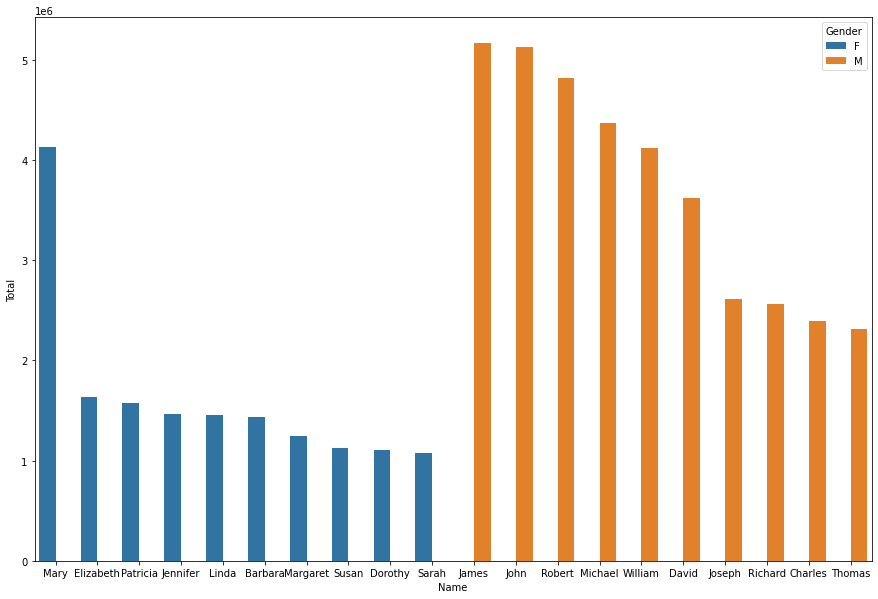

In [22]:
#Use bar graph 
plt.figure(figsize = (15, 10))
sns.barplot(x = "Name", y = "Total", data = all_times, hue = "Gender")
plt.show()

 - Data shows us the most poular names for both female and males of all time (1880-2018)

## General Trends over Time (1880 - 2018)

- Explore how names have changed over a period of time 

- Birthrates have increased since 1880 

- Amount of registered birth have increased 

In [23]:
pd.options.display.float_format = '{:.0f}'.format

In [24]:
babies_per_year = df.groupby("Year").Count.sum()

In [25]:
babies_per_year

Year
1880     201484
1881     192696
1882     221533
1883     216944
1884     243461
         ...   
2014    3698914
2015    3691990
2016    3657797
2017    3561975
2018    3487353
Name: Count, Length: 139, dtype: int64

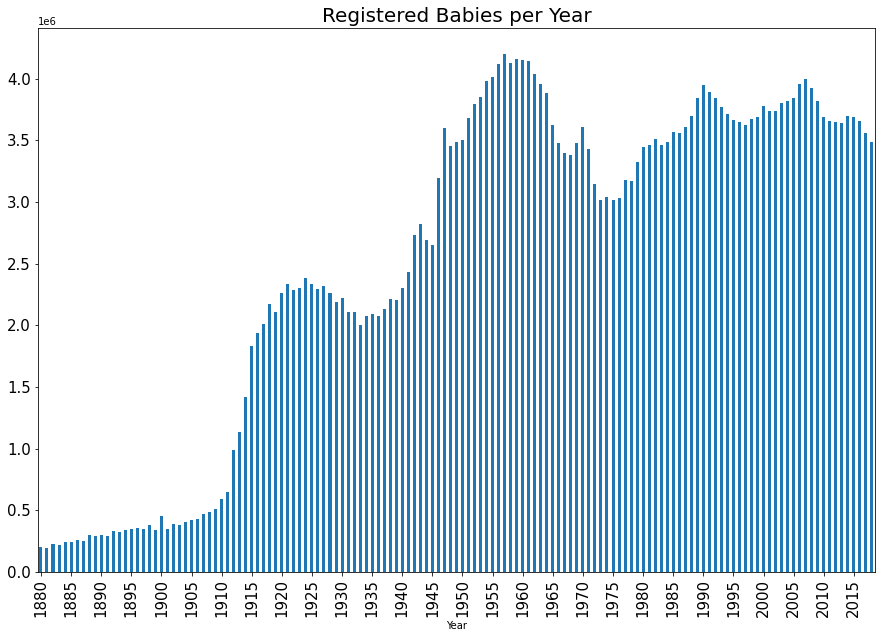

In [26]:
#Plot bar graph
babies_per_year.plot(kind = "bar", y= "Count", figsize = (15, 10), fontsize = 15)
plt.xticks(ticks = (range(0, len(babies_per_year), 5)), labels =  range(1880, 2019, 5))
plt.title("Registered Babies per Year", fontsize = 20)
plt.show()

# Conclusion - Examine data to answer relevant questions based on the project

- First massive increase of registered baby names are from 1910 to 1930
- Second spike from 1945 to 1960 
- 1950 to 1955 marks the highest peak of registered births for the range of 1880 to 2018 

In [27]:
#filter count by year 
diff_names = df.groupby("Year").Name.count()
diff_names

Year
1880     2000
1881     1935
1882     2127
1883     2084
1884     2297
        ...  
2014    33243
2015    33121
2016    33010
2017    32590
2018    32033
Name: Name, Length: 139, dtype: int64

- Note these unique values also represent unisex names 

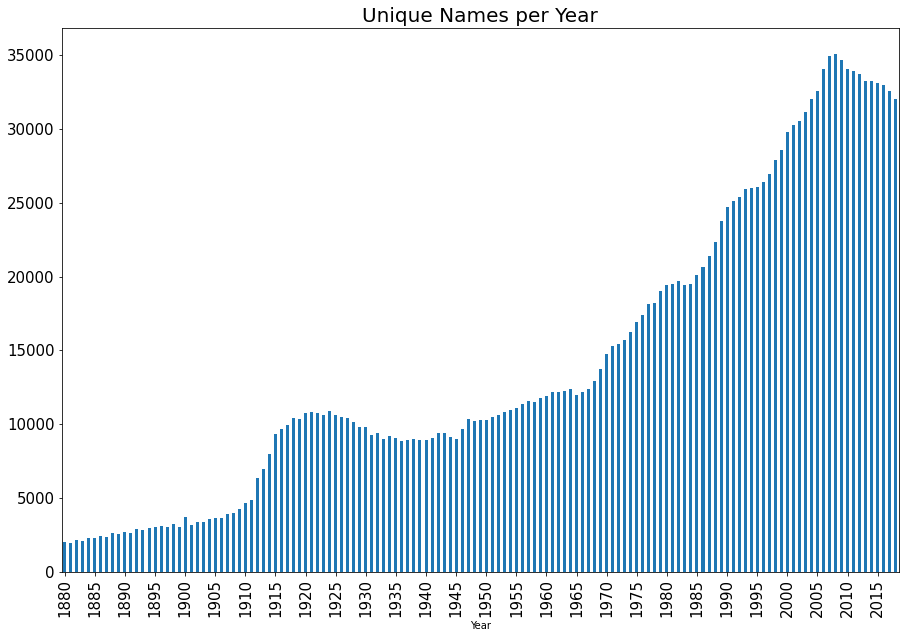

In [28]:
#Plot bar graph for unique values names
diff_names.plot(kind = "bar", figsize = (15, 10), fontsize = 15)
plt.xticks(ticks = (range(0, len(diff_names), 5)), labels =  range(1880, 2019, 5))
plt.title("Unique Names per Year", fontsize = 20)
plt.show()

 # Conclusion - examine unique names per year 
 
 - 2007 marks the highest year for unique baby names registered at over 35,000 
 
 - Names are getting more diverse 

## Creating the Features "Popularity" and "Rank"

- Babies rank per million
- Per year and gender

In [29]:
#Explore dataframe
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


__Popularity (babies per million)__

- Calculate relative frequency total count of female names / total names count

In [30]:
# groupby year and gender / count sum
df.groupby(["Year", "Gender"]).Count.sum()

Year  Gender
1880  F           90994
      M          110490
1881  F           91953
      M          100743
1882  F          107847
                 ...   
2016  M         1891585
2017  F         1719138
      M         1842837
2018  F         1686961
      M         1800392
Name: Count, Length: 278, dtype: int64

In [31]:
#Per babies per millions formula
7065 / 90994 * 1000000

77642.48192188496

In [32]:
# Use transform 
df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum"))*1000000

0         77642
1         28617
2         22012
3         21309
4         19188
           ... 
1957041       3
1957042       3
1957043       3
1957044       3
1957045       3
Name: Count, Length: 1957046, dtype: float64

In [33]:
df["Popularity"] = df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum"))*1000000

In [75]:
#Explore names with highest frequency 
df

,Year,Name,Gender,Count,Popularity
0,1880,Mary,F,7065,77642
1,1880,Anna,F,2604,28617
2,1880,Emma,F,2003,22012
3,1880,Elizabeth,F,1939,21309
4,1880,Minnie,F,1746,19188
...,...,...,...,...,...
1957041,2018,Zylas,M,5,3
1957042,2018,Zyran,M,5,3
1957043,2018,Zyrie,M,5,3
1957044,2018,Zyron,M,5,3


__Rank__

In [34]:
# Use Lambda 
df.groupby(["Year", "Gender"]).Count.apply(lambda x: x.rank(ascending = False))

0             1
1             2
2             3
3             4
4             5
           ... 
1957041   13042
1957042   13042
1957043   13042
1957044   13042
1957045   13042
Name: Count, Length: 1957046, dtype: float64

In [35]:
# 
df["Rank"] =  df.groupby(["Year", "Gender"]).Count.apply(lambda x: x.rank(ascending = False))

In [78]:
#Explore data by rank 
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042
1957042,2018,Zyran,M,5,3,13042
1957043,2018,Zyrie,M,5,3,13042
1957044,2018,Zyron,M,5,3,13042


In [80]:
# Filter year and gender 
df[(df.Year == 2018) & (df.Gender == "M")].head(60)

,Year,Name,Gender,Count,Popularity,Rank
1943042,2018,Liam,M,19837,11018,1
1943043,2018,Noah,M,18267,10146,2
1943044,2018,William,M,14516,8063,3
1943045,2018,James,M,13525,7512,4
1943046,2018,Oliver,M,13389,7437,5
1943047,2018,Benjamin,M,13381,7432,6
1943048,2018,Elijah,M,12886,7157,7
1943049,2018,Lucas,M,12585,6990,8
1943050,2018,Mason,M,12435,6907,9
1943051,2018,Logan,M,12352,6861,10


In [81]:
# Filter by year and gender / popularity sum 
df[(df.Year == 2018) & (df.Gender == "M")].Popularity.sum()

999999.9999999999

In [36]:
# load in data 
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042
1957042,2018,Zyran,M,5,3,13042
1957043,2018,Zyrie,M,5,3,13042
1957044,2018,Zyron,M,5,3,13042


In [40]:
# Filter by name / gender / by year 
mary = df[(df.Name == "Emma") & (df.Gender == "F")]
mary.tail(60)

,Year,Name,Gender,Count,Popularity,Rank
560973,1959,Emma,F,1057,522,270
572765,1960,Emma,F,980,485,296
584698,1961,Emma,F,888,440,307
596905,1962,Emma,F,797,405,332
609134,1963,Emma,F,723,375,352
621407,1964,Emma,F,770,406,343
633820,1965,Emma,F,639,362,359
645777,1966,Emma,F,619,366,364
657949,1967,Emma,F,564,342,385
670388,1968,Emma,F,491,299,428


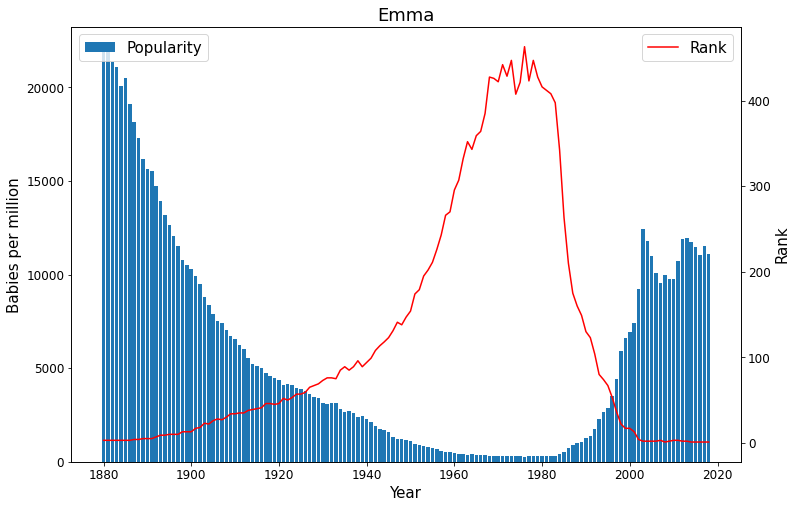

In [41]:
# Plot graph to show popularity and rank trends
fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.bar(x = mary.Year, height= mary.Popularity, label = "Popularity")
ax2 = ax1.twinx()
ax2.plot(mary.Year, mary.Rank, color = "red", label = "Rank")
ax1.set_xlabel("Year", fontsize = 15)
ax1.set_ylabel("Babies per million", fontsize = 15)
ax2.set_ylabel("Rank", fontsize = 15)
ax1.set_title("Emma", fontsize = 18)
ax1.tick_params(labelsize = 12)
ax2.tick_params(labelsize = 12)
ax1.legend(loc = 2, fontsize = 15)
ax2.legend(loc = 1, fontsize = 15)
plt.show()

In [42]:
def plot_name(name, gender, crit = "Popularity"):
    data = df.loc[(df.Name == name) & (df.Gender == gender), ["Name", "Gender", "Year", "Rank", crit]]
    data = data.set_index("Year")
    
    fig, ax1 = plt.subplots(figsize = (12, 8))
    ax1.bar(x = data.index, height= data[crit], label = crit)
    ax2 = ax1.twinx()
    ax2.plot(data.index, data.Rank, color = "red", label = "Rank")
    ax1.set_xlabel("Year", fontsize = 15)
    ax1.set_ylabel(crit, fontsize = 15)
    ax2.set_ylabel("Rank", fontsize = 15)
    ax1.set_title(name, fontsize = 18)
    ax1.tick_params(labelsize = 12)
    ax2.tick_params(labelsize = 12)
    ax1.legend(loc = 2, fontsize = 15)
    ax2.legend(loc = 1, fontsize = 15)
    plt.show()

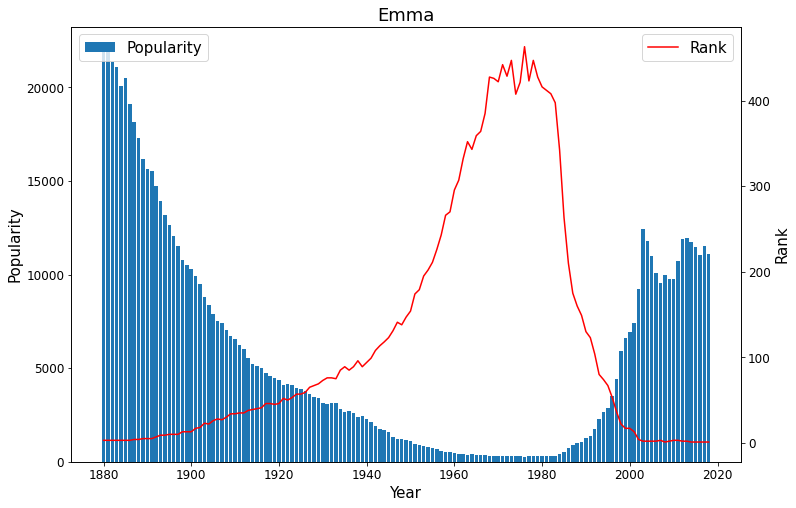

In [43]:
plot_name("Emma", "F")

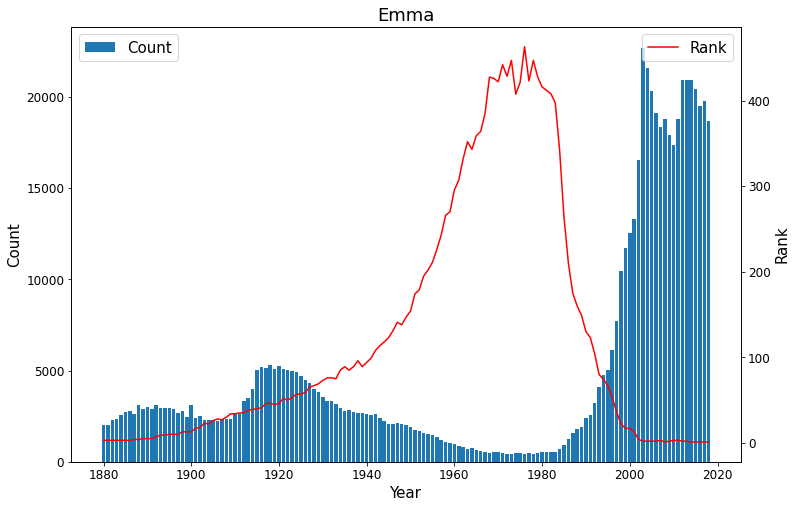

In [44]:
plot_name("Emma", "F", crit = "Count")

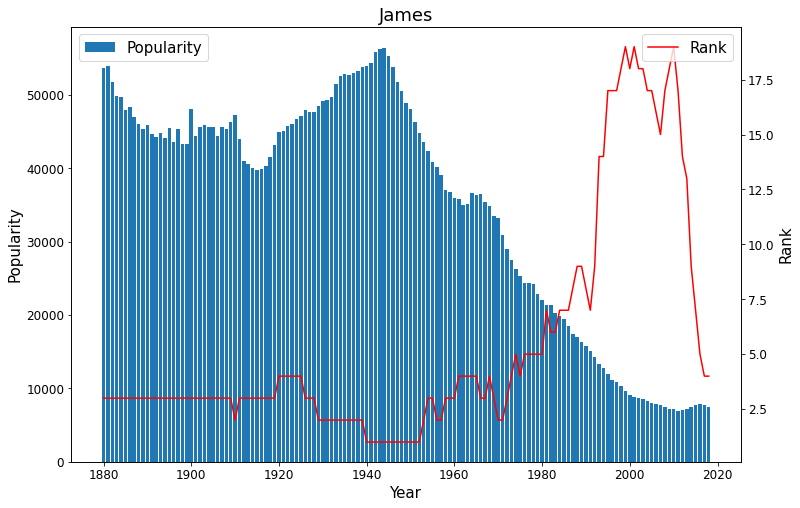

In [45]:
plot_name("James", "M", crit = "Popularity")

_Conclusion_ for Emma names 

-  In the 1880's Emma had a very high trend of over 20,000 which decreased every year until around 1980's.

- After 1980's the name became popular again reaching a popularity of 15,000

## Why does a Name´s Popularity suddenly change? (Part 1)

In [ ]:
df

In [ ]:
df.loc[(df.Name == "Mary") & (df.Gender == "F"), "Popularity"].shift()

In [ ]:
df["Pop_lag1"] = df.groupby(["Name", "Gender"]).Popularity.shift()

In [ ]:
df

In [ ]:
df[df.Name == "Ashanti"]

In [ ]:
df.loc[(df.Year > 1880) & (df.Pop_lag1.isna()), "Pop_lag1"] = 0

In [ ]:
df[df.Name == "Ashanti"]

In [ ]:
df["Pop_diff"] = df.Popularity - df.Pop_lag1

In [ ]:
df[(df.Name == "Mary") & (df.Gender == "F")]

In [ ]:
df[df.Name == "Ashanti"]

In [ ]:
df2 = df[df.Year >= 1900].copy()

In [ ]:
df2

In [ ]:
df2.nlargest(20, "Pop_diff")

In [ ]:
plot_name("Linda", "F")

In [ ]:
plot_name("Shirley", "F")

In [ ]:
plot_name("Jason", "M")

In [ ]:
df2.nsmallest(20, "Pop_diff")

## Why does a Name´s Popularity suddenly change? (Part 2)

__'From 0 to 100' Names__

In [ ]:
df2[(df2.Pop_lag1 < 5)].nlargest(20, "Pop_diff")

In [ ]:
df2[df2.Name == "Nakia"]

In [ ]:
plot_name("Nakia", "F")

In [ ]:
plot_name("Nakia", "M")

In [ ]:
plot_name("Kizzy", "F")

In [ ]:
plot_name("Rihanna", "F")

In [ ]:
plot_name("Whitney", "F")

In [ ]:
plot_name("Shaquille", "M")

__Highest percentage decrease among popular names__

In [ ]:
df2

In [ ]:
df2["%change"] = df2.Popularity.div(df2.Pop_lag1).sub(1).mul(100)

In [ ]:
df2

In [ ]:
df2[df2.Pop_lag1 > 1000].nsmallest(20, "%change")

In [ ]:
plot_name("Katina", "F")

In [ ]:
plot_name("Iesha", "F")

In [ ]:
plot_name("Ashanti", "F")

In [ ]:
plot_name("Woodrow", "M")

In [ ]:
plot_name("Hillary", "F")

### Persistant vs. Spike-Fade Names

In [ ]:
agg

In [ ]:
agg["Spike_Score"] = agg.Max_Count.div(agg.Total).mul(100)

In [ ]:
agg

In [ ]:
agg.sort_values(by = "Spike_Score", ascending = True).head(20)

In [ ]:
pers = agg.sort_values(by = "Spike_Score", ascending = True).head(20)

In [ ]:
pers

In [ ]:
l = list(zip(pers.Name, pers.Gender))
l

In [ ]:
for name in l:
    plot_name(name = name[0], gender = name[1], crit = "Count")

In [ ]:
spike = agg[(agg.Total > 1000) & (agg.No_Year > 10)].sort_values(by = "Spike_Score",
                                                                 ascending = False).head(20)
spike

In [ ]:
l2 = list(zip(spike.Name, spike.Gender))
l2

In [ ]:
for name in l2:
    plot_name(name = name[0], gender = name[1], crit = "Count")

## Most Popular Unisex Names

In [ ]:
df

In [ ]:
df[df.Name == "Mary"].groupby(["Name", "Gender"]).Count.sum()

In [ ]:
df.groupby(["Name", "Gender"]).Count.sum().unstack()

In [ ]:
unisex = df.groupby(["Name", "Gender"]).Count.sum().unstack()
unisex

In [ ]:
unisex.dropna(inplace = True)

In [ ]:
unisex

In [ ]:
unisex.min(axis = 1).sort_values(ascending = False)

In [ ]:
unisex_names = unisex.min(axis = 1).sort_values(ascending = False).index
unisex_names

In [ ]:
unisex.loc[unisex_names].head(20)

In [ ]:
unisex = unisex[unisex.min(axis = 1) > 10000]
unisex

In [ ]:
abs(unisex.F.div(unisex.M).sub(1)).sort_values()

In [ ]:
unisex_names2 = abs(unisex.F.div(unisex.M).sub(1)).sort_values().index
unisex_names2

In [ ]:
unisex.loc[unisex_names2].head(20)